### Data Set Info:
    - Essential to locate city bike to its appropriate place & time in order to provide them sufficiently
    - Dataset enclosing various weather conditions and, accordingly, rental date + bike rental counts

### Attribute Info:
    - Date; YYYY-mm-dd
    - Rental bike count; rental bike count each hour
    - Hour
    - Temperature; Celcius
    - Humidity; %
    - Windspeed; m/s
    - Visibility; 10m
    - Dew point temperature; Celsius 
    - Solar radiation; MF/m2
    - Rainfall; mm
    - Snowfall; cm
    - Seasons; Winter, Spring, Summer, Atutumn
    - Holiday - Holiday/Non-holi
    - Functional day; Functional hours/Non-func

### Table of Contents:
+ Data manipulation
    + Importing libraries
    + Importing dataset
    + Dataset view
    + Dataset info
    + Summary stat
    + Check for unique values in integer type attributes
    + Check for missing values in each column
    + Check for % missing values in each column
+ Data visualization
    + Missing value plot
    + Density plot of continuous variables
    + Box plot for each continuous variables
    + Heatmap
    + Density plot of each continuous variable after applying power transformer
    + Box plot of each continuous variable after applying power transformer
    + Bar plot of each variable show label distribution of target variable
    + Pie chart of categorical variables
    + Count plot of categorical variables
+ Variance inflation factor
+ Feature selection
    + Feature importance graph
+ Splitting our dataset into train and test set
+ Feature scaling
+ Modeling
    + Linear regression
    + Polynomial regression
    + Decision tree resgression
    + Random forest regression
    + Bagging regressor
    + Stacking regressor
+ Model comparison
    + Max. accuracies in each column
    + Min. Accuracies in each column

### Data manipulation

+ Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
    # 설정 변경하여 출력 표의 크기 변경 가능
    # 최대 행/열 = 100개로 제한

+ Importing dataset

In [3]:
df = pd.read_csv('C:/Python/00 Study/005_Seoul Bike Sharing Demand Prediction_Bike Rental Prediction/SeoulBikeData.csv', encoding = 'unicode_escape', parse_dates = [0])
    # df로 데이터명 정의
    # parse_dates; read_csv() 함수 사용, text/csv 파일 읽어온 후 DataFrame 생성 시 날짜/시간 (Date/Time) 이 포함된 경우 해당 형식 (Datetime)에 맞도록 파싱하여 읽어오는 방법

+ Dataset view

In [4]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


+ Dataset info

Below we can see that:  
~ 1 feature in **date** type  
~ 4 features in **integer** type  
~ 6 features in **float** type  
~ 3 features in **object** type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [6]:
df = df.astype({'Rented Bike Count' : 'float', 'Hour' : 'object'})
    # df.astype({'열이름 : '변경할 종류', ... })
    # df 내의 데이터 종류 변경
    # Hour는 왜 object로 바꿨나? -- + x축에 고정하여 타 변수와 그래프 생성 시, 안정된 값 출력 목적? / float, int에 해당하는 열로 테이블 생성 시 미포함

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
df = df.rename(columns = {'Temperature(°C)' : 'Temperature', 'Humidity(%)' : 'Humidity', 'Rainfall(mm)' : 'Rainfall', 'Snowfall(cm)' : 'Snowfall', 'Wind speed (m/s)' : 'Wind speed', 'Visibility (10m)' : 'Visibility', 'Solar Radiation (MJ/m2)' : 'Radiation', 'Dew point temperature(°C)' : 'Dew point temperature'})
    # 열이름 재지정

+ Summary stat

Brief info of different descriptive stats:  
~ Measures of frequency; count, percent, frequency  
~ Measures of central tendency; mean, median, mode  
~ Measures of dispersion or variation; range(min, max), variance, standard deviation  
~ Measures of position; perentile ranks, quartile ranks  

In [9]:
df.describe().style.background_gradient()
    #.style.background_gradient(); 그라데이션스타일 배경색 지정 (색상은 각 열/행/프레임데이터 혹은 주어진 그라디언트 맵 등에 따라 결정됨)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


+ Check for unique values in all attribute

Different numbers of distinct values in each attribute  
Our target variable is Rented Bike Count

In [10]:
df.nunique().sort_values(ascending = True)
    #.nunique(); 고유값 개수 확인

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall (cm)              51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

+ Checking for missing values in each column

No such missing values in our dataset  
For missing value treatment; [here](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/)

In [11]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall (cm)            0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

+ % missing values in each column

In [12]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum() / len(df)) * 100)
# pd.options.display.float_format = '{:,.2f}'.format -- 왜 포함했을까? 주석처리하여도 동일하게 출력
    # pd.options.display.float_format; 실수 출력 함수 설정 가능
    # :,.2f; 소수점 둘째자리까지 표현

Date                    0.00 %
Rented Bike Count       0.00 %
Hour                    0.00 %
Temperature             0.00 %
Humidity                0.00 %
Wind speed              0.00 %
Visibility              0.00 %
Dew point temperature   0.00 %
Radiation               0.00 %
Rainfall                0.00 %
Snowfall (cm)           0.00 %
Seasons                 0.00 %
Holiday                 0.00 %
Functioning Day         0.00 %
dtype: float64


### Data visualization

+ Missing value plot

In [13]:
import missingno as msno

<AxesSubplot:>

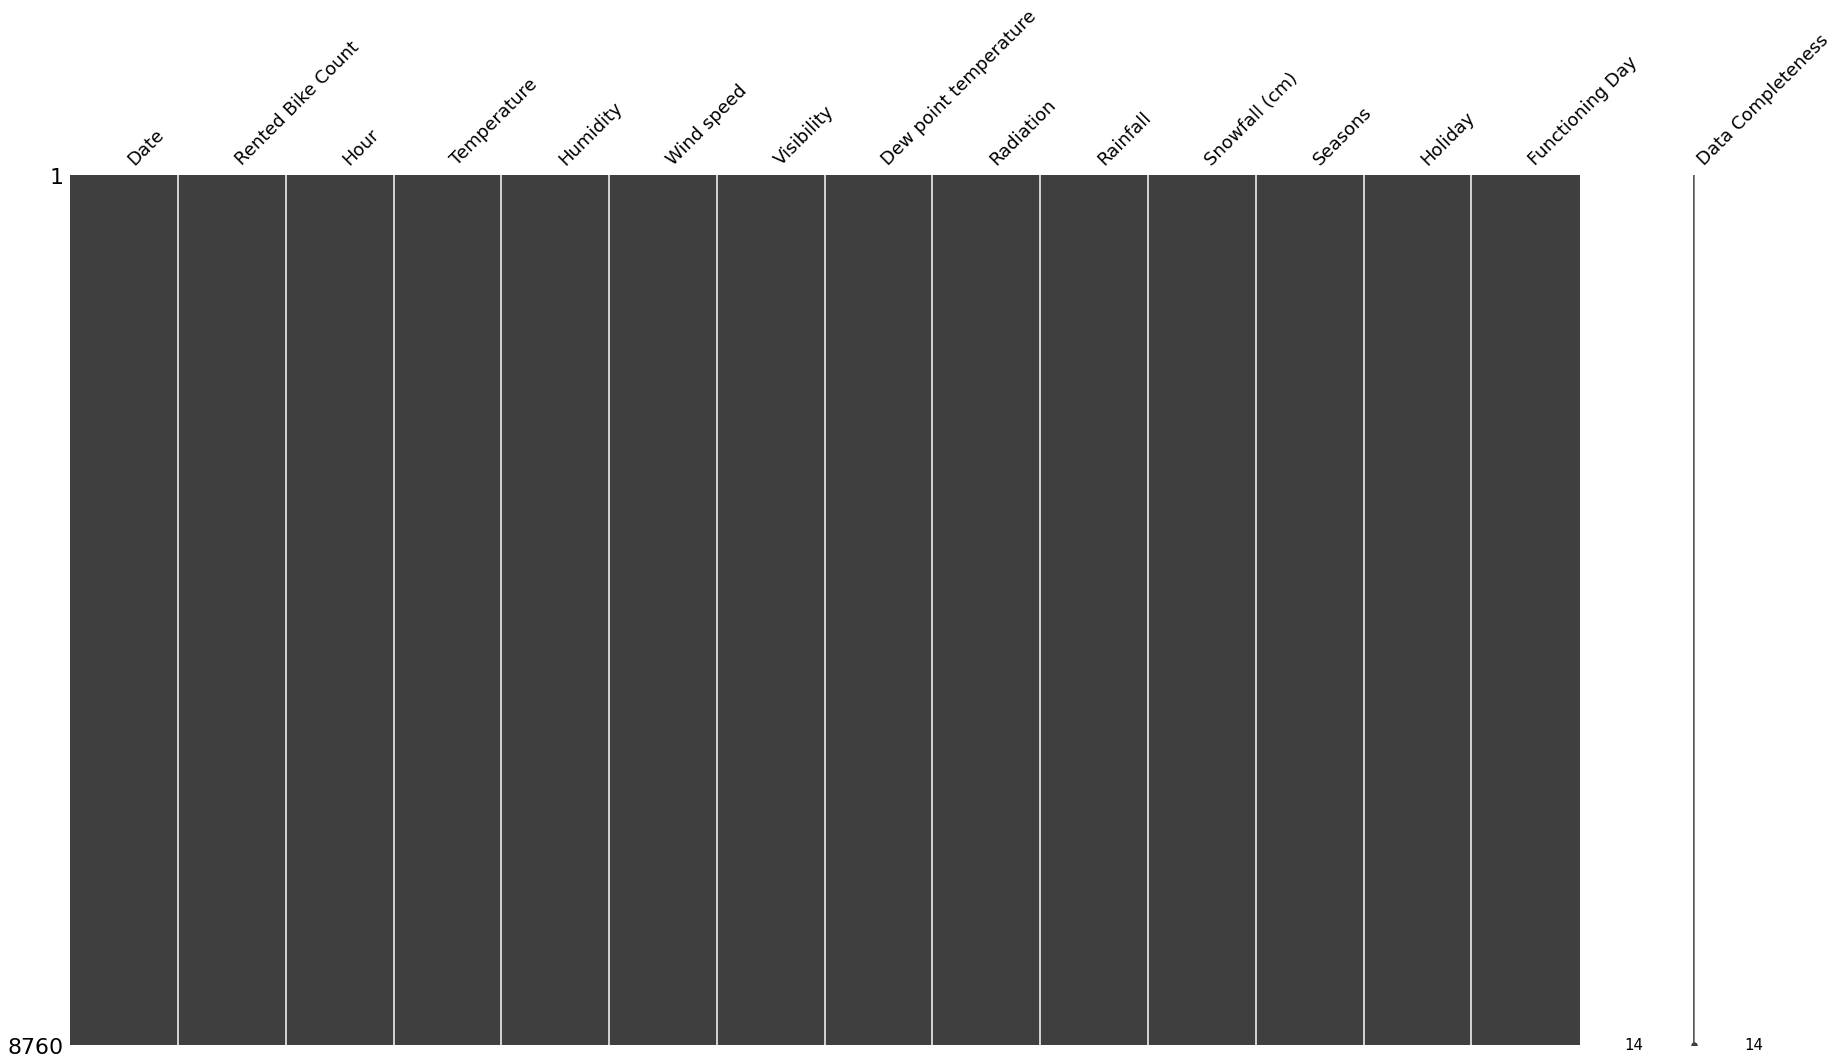

In [14]:
msno.matrix(df, labels = [df.columns], figsize = (30, 16), fontsize = 18)
    # missingno (msno) 사용, 결측치 확인
    # msno.matrix(데이터프레임, labels = [데이터프레임.열(라벨로 삽입하고자하는 내용)], figsize = figure 크기, fontsize = 폰트 크기)

+ Bar plot

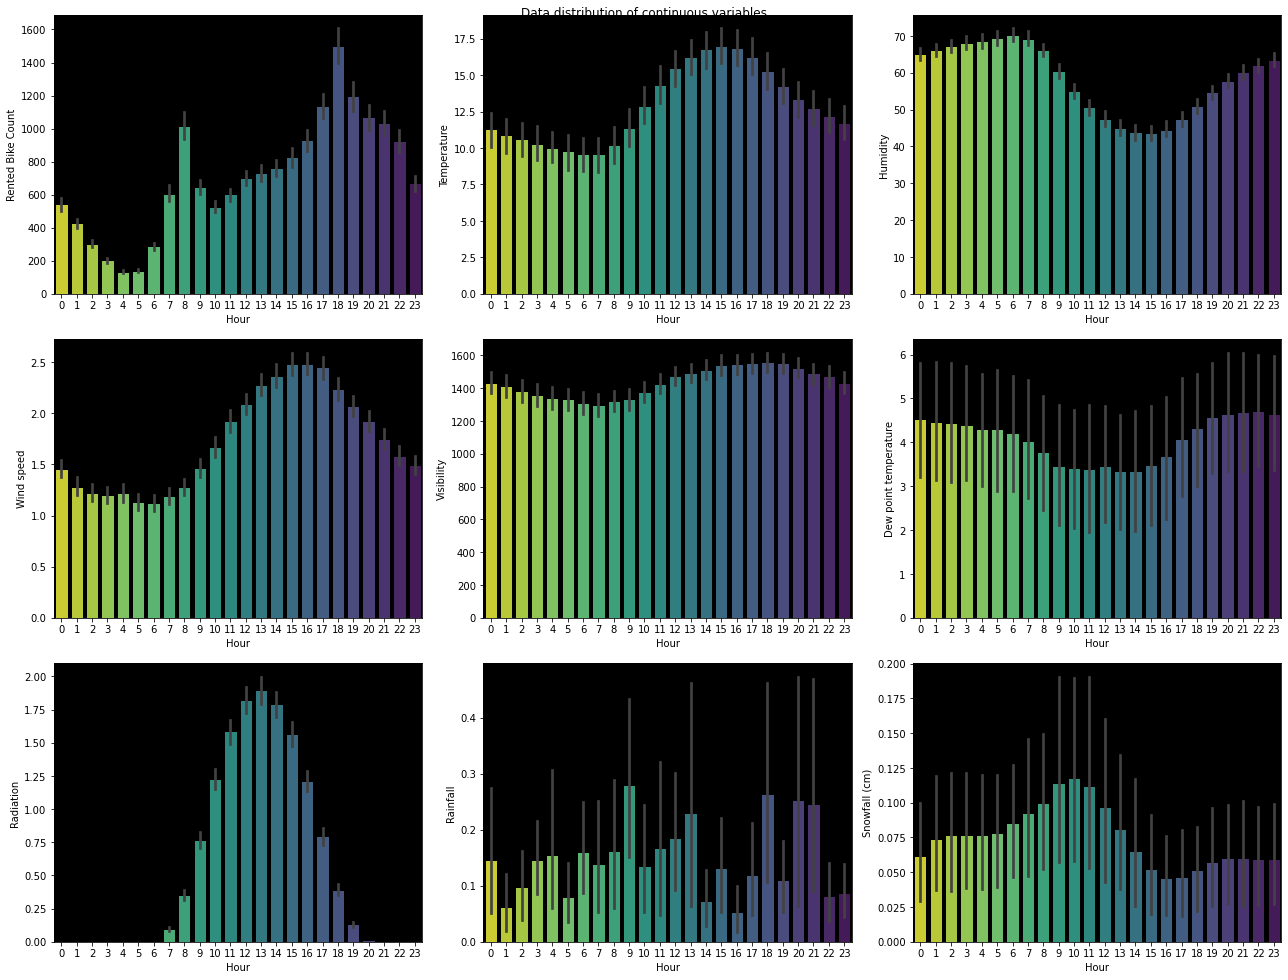

In [15]:
plt.figure(figsize = (18, 18))

for i, col in enumerate(df.select_dtypes(include = ['float64', 'int']).columns): 
    # enumerate 함수 사용, dtypes가 float64 & int인 df의 칼럼 반환
    # float vs. float64; 32bit vs. 64bit (double) / 정확도의 차이
    # double 사용 시 더 정확한 계산 가능, 작은 오차도 중요한 경우 사용 / 참고: https://blog.naver.com/nkdy0/222509383224
    plt.rcParams['axes.facecolor'] = 'black' # 배경색 지정
    ax = plt.subplot(4, 3, i + 1) # (n_row, n_col, i + 1)
    sns.barplot(data = df, x = 'Hour', y = col, ax = ax, edgecolor = 'black', palette = 'viridis_r')
        # x축 = Hour, y = 값을 float/int로 가지는 각 칼럼
plt.suptitle('Data distribution of continuous variables')

plt.tight_layout() # layout 자동 설정

Checking the data distribution of each continuous variable

+ Skewed Distribution

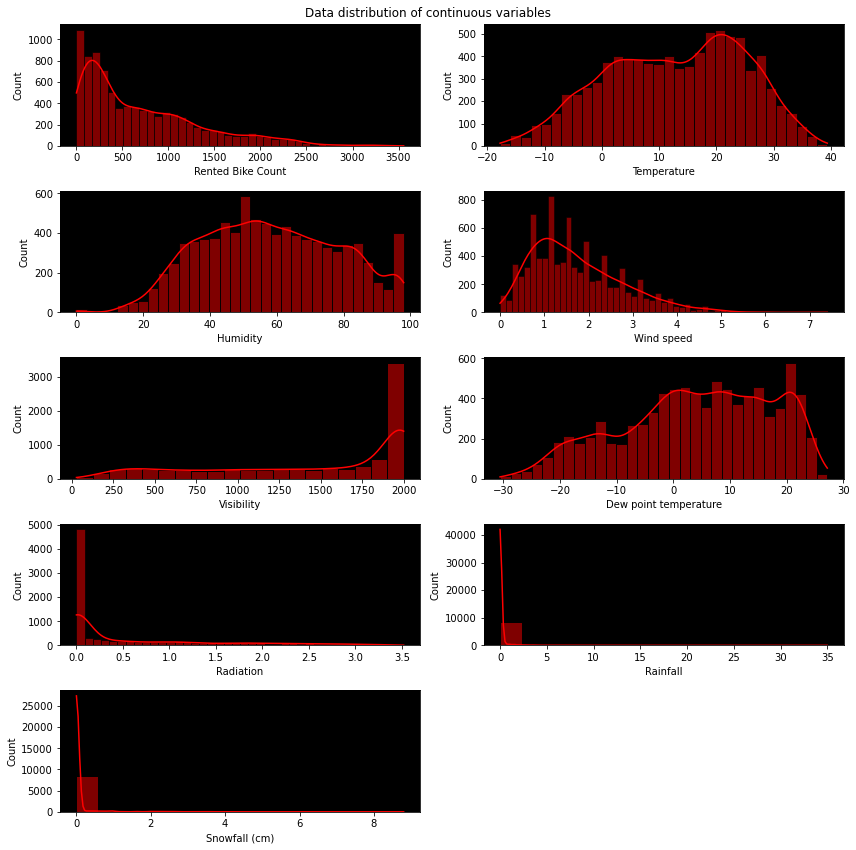

In [16]:
plt.figure(figsize = (12, 12))

for i, col in enumerate(df.select_dtypes(include = ['float64', 'int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5, 2, i + 1)
    sns.histplot(data = df, x = col, ax = ax, color = 'red', kde = True) # kde = Kernel Density Estimator
    
plt.suptitle('Data distribution of continuous variables')

plt.tight_layout()

+ Box plot

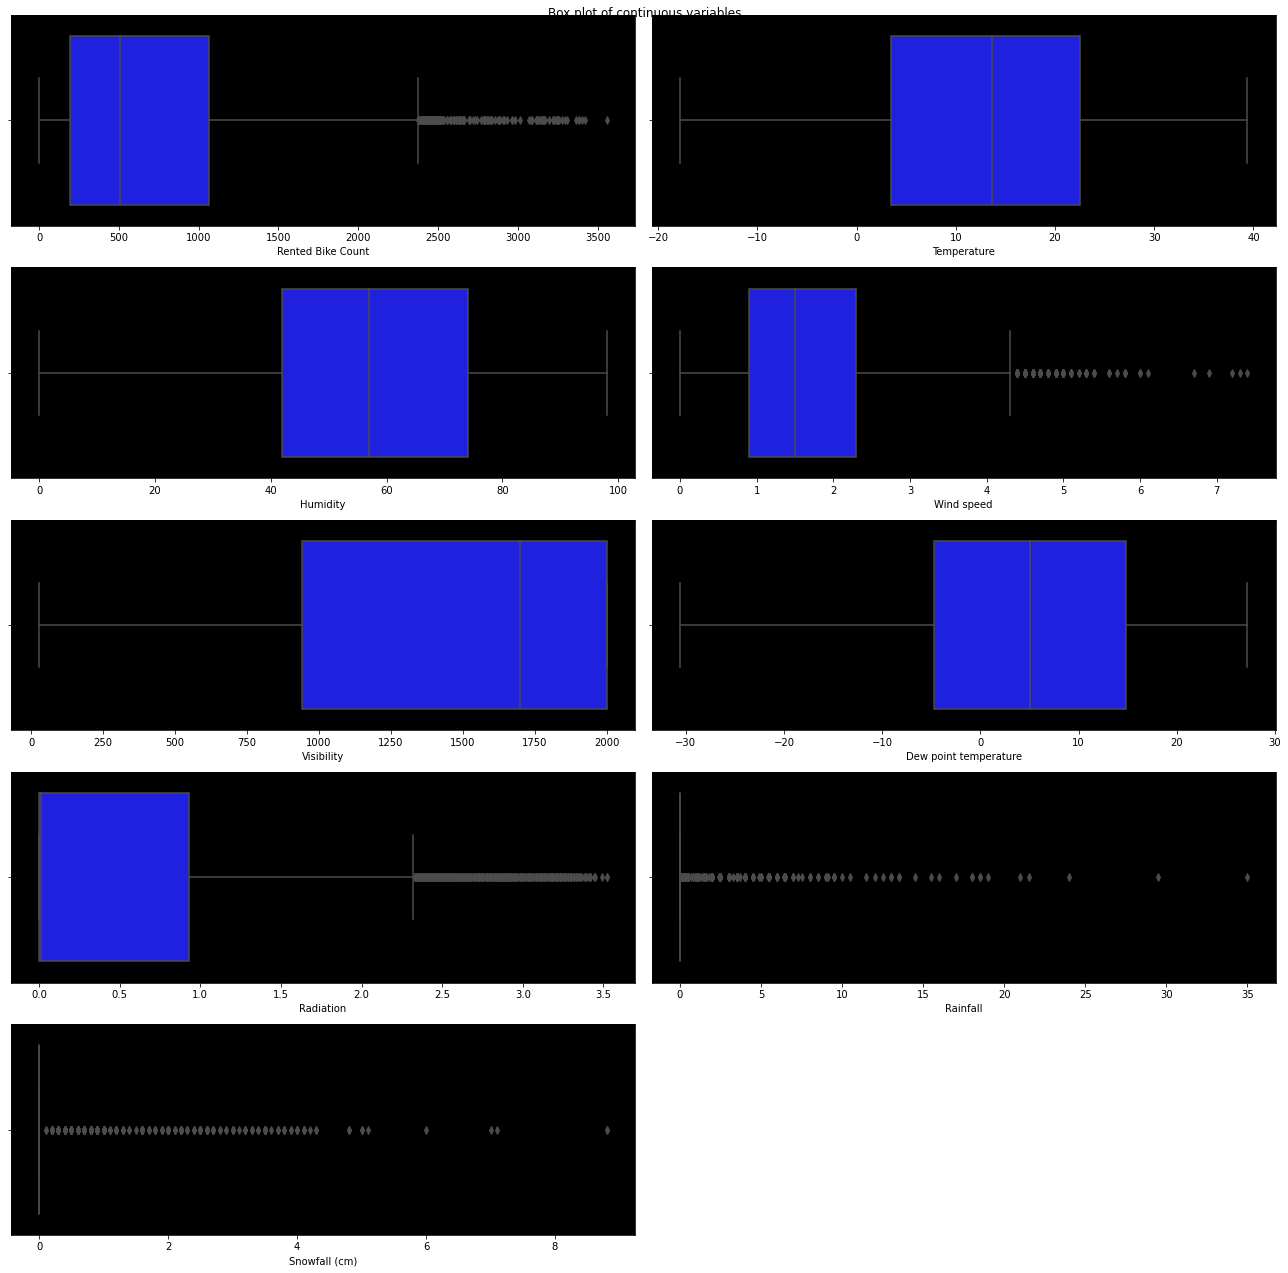

In [17]:
plt.figure(figsize = (18, 18))

for i, col in enumerate(df.select_dtypes(include = ['float64', 'int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5, 2, i + 1)
    sns.boxplot(data = df, x = col, ax = ax, color = 'blue')
    
plt.suptitle('Box plot of continuous variables')

plt.tight_layout()

+ Power transformation

In [18]:
#selecting variables that have data types float and int.
var = list(df.select_dtypes(include = ['float64', 'int64']).columns)

In [19]:
from sklearn.preprocessing import PowerTransformer
    # PowerTransformer; 데이터 특성별 정규분포 형태에 가깝게 변환
sc_X = PowerTransformer(method = 'yeo-johnson')
    # PowerTransformer(method =  매개변수에 'yeo-johnson'_기본값 혹은 'box-cox' 알고리즘 지정 가능)
    # 가우시안 분포가 되도록 제로 평균 분산 정규화 적용, 데이터 변환
    # box-cox; 데이터에 양수만 있는 경우
    # yeo-johnson; 데이터에 음수 포함하는 경우
    # 차이점 등 들여다보기; 참고: https://blog.naver.com/kim_junhan/222681627578
df[var] = sc_X.fit_transform(df[var])
    # 변환 내용 반환

+ Data distribution after applying power transformer

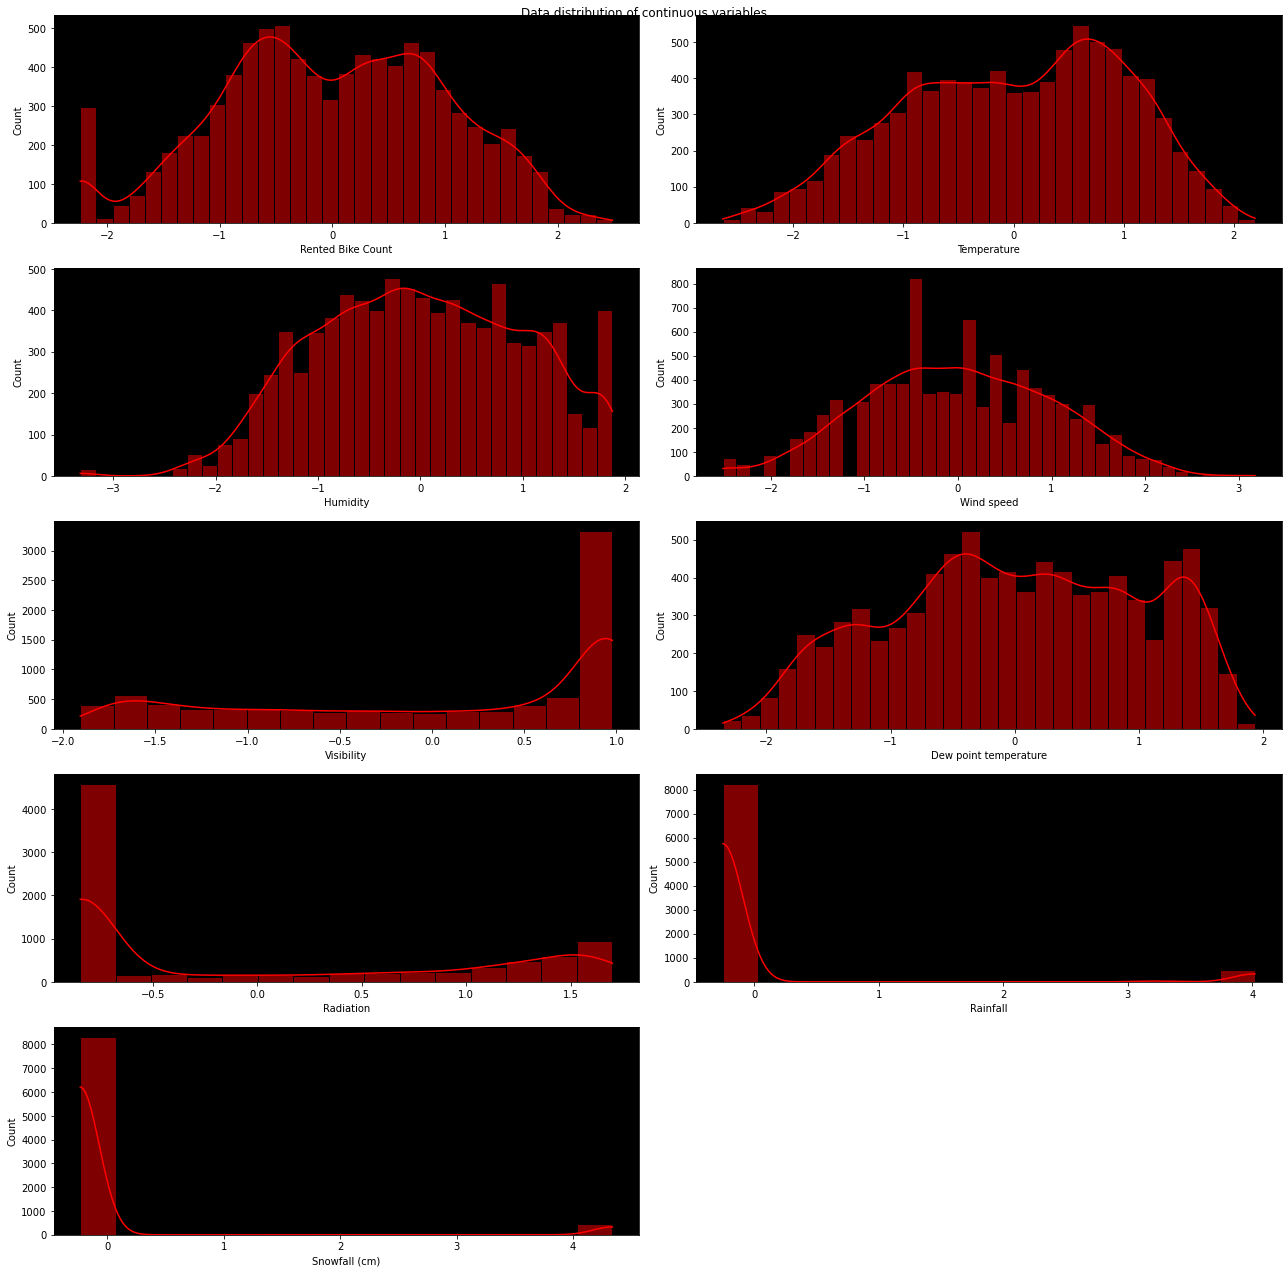

In [20]:
plt.figure(figsize = (18, 18))

for i, col in enumerate(df.select_dtypes(include = ['float64', 'int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5, 2, i + 1)
    sns.histplot(data = df, x = col, ax = ax, color = 'red', kde = True)
    
plt.suptitle('Data distribution of continuous variables')

plt.tight_layout()

Box plot after applying power transformer

Now our box plots look better after treating the outliers

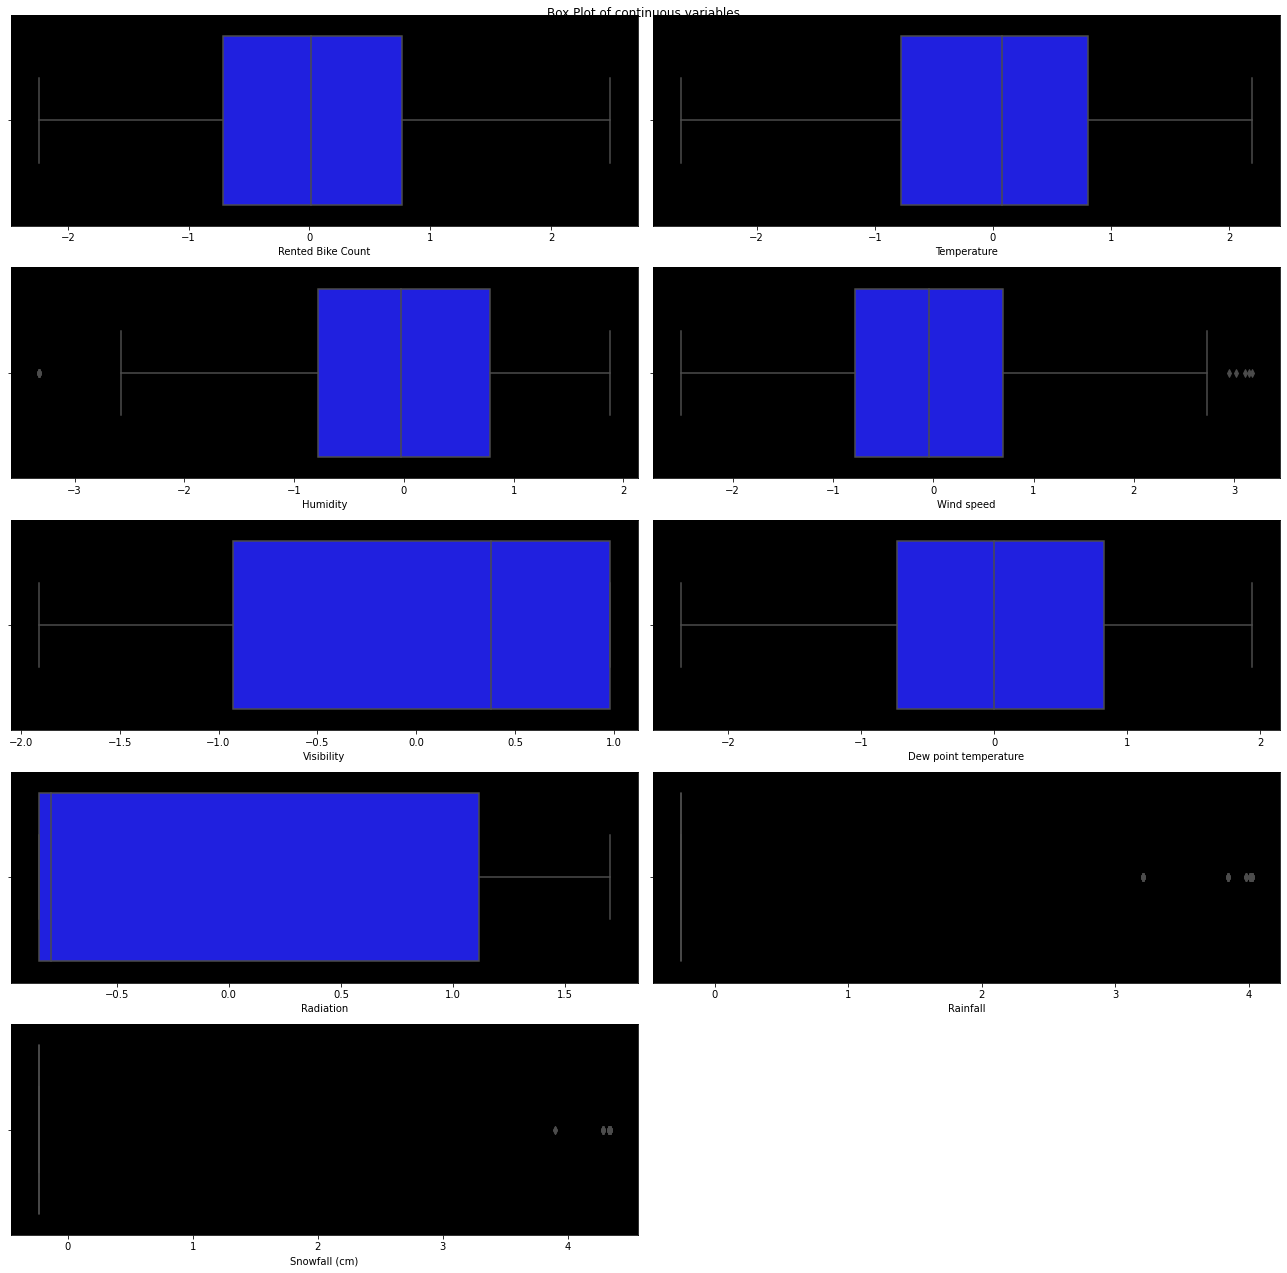

In [21]:
plt.figure(figsize = (18, 18))

for i, col in enumerate(df.select_dtypes(include = ['float64', 'int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5, 2, i + 1)
    sns.boxplot(data = df, x = col, ax = ax, color = 'blue')
    
plt.suptitle('Box Plot of continuous variables')

plt.tight_layout()

+ Heatmap

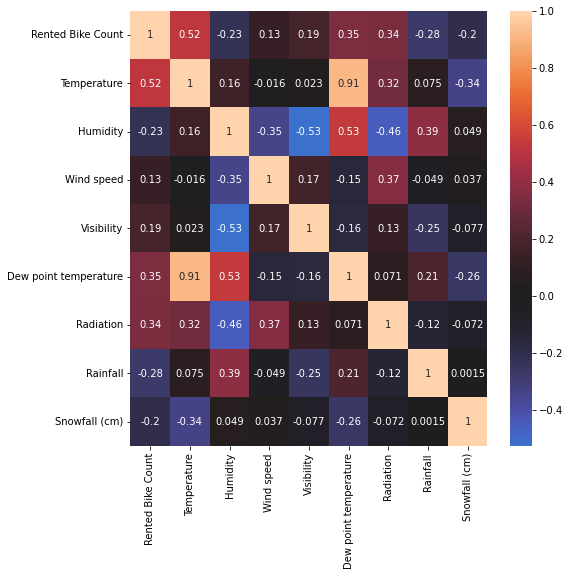

In [22]:
plt.figure(figsize = (8, 8))

sns.heatmap(df.select_dtypes(include = ['float']).corr(), annot = True, center = 0) # annot = True; 값은 칸 내에 출력

plt.show()

Analyzing Categorical Variable

+ Pie chart

From the below graph it's clear that this is fully balanced data

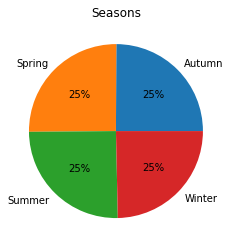

In [23]:
season_var = pd.crosstab(index = df['Seasons'], columns = '% observations')
    # pd.crosstab(index_행으로 그룹화 할 값, columns_열로 그룹화 할 값); 각 범주형 데이터의 개수를 행, 열로 교차해놓은 표
    
plt.pie(season_var['% observations'], labels = season_var['% observations'].index, autopct = '%.0f%%')
    # plt.pie(각 영역의 비율, labels = 각 영역 이름, autopct = 부채꼴 내 표시될 숫자 형식 지정)
    # .index; 인덱스명 출력 / 삭제 시, Seasons 값의 개수 출력

plt.title('Seasons')

plt.show()

In [24]:
season_var

col_0,% observations
Seasons,
Autumn,2184
Spring,2208
Summer,2208
Winter,2160


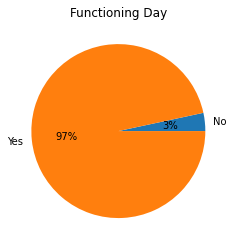

In [25]:
Functioning_Day_var = pd.crosstab(index = df['Functioning Day'], columns = '% observations')

plt.pie(Functioning_Day_var['% observations'], labels = Functioning_Day_var['% observations'].index, autopct = '%.0f%%')

plt.title('Functioning Day')

plt.show()

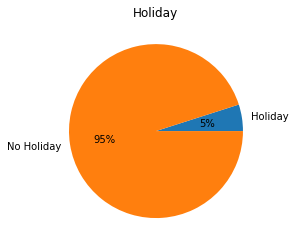

In [26]:
holiday_var = pd.crosstab(index = df['Holiday'], columns = '% observations')

plt.pie(holiday_var['% observations'], labels = holiday_var['% observations'].index, autopct = '%.0f%%')

plt.title('Holiday')

plt.show()

Count plot shows that the seasons variable is balanced

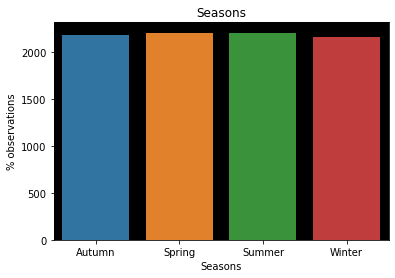

In [27]:
sns.barplot(x = season_var.index, y = season_var['% observations'])

plt.title('Seasons')

plt.show()

In [28]:
df = pd.get_dummies(df, columns = ['Holiday', 'Seasons', 'Functioning Day', 'Hour'], drop_first = True)
    # pd.get_dummies; 가변수 생성 함수 / 참고: https://mizykk.tistory.com/13
    # object 형식의 데이터를 수치로 변환하기 위한 전처리 작업
    # 1. 수치형 데이터로 변환 > 2. 수치화된 데이터를 가변수화하여 표현 / 가변수화 목적: 수치형 데이터로만 변환 시 서로 간 관계성 생성 (예. 1 = 월요일, 2 = 화요일일때, 1 + 2 = 3 관계 생성, which does not exist irl)

In [29]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]
    # df.iloc[행, 열]
    # 인덱스 제외, 행/열에 부여된 순서로 데이터 접근
    # df.loc['#']의 경우, '#' 등의 행/열의 인덱스명으로 접근

### Variance inflation factor

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    
    # Calculating VIF; Variance Inflation Factor
    # 다중공선성 (multicolinearity); 각 feature 간 상관관계가 높아 분석에 부정적인 영향을 미치는 현상
    # 각 feature의 다중공선성 해결을 위해 분산팽창요인 (variance inflation factor) 평가 
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [31]:
calc_vif(X.select_dtypes(include = ['float', 'int']))

,variables,VIF
0,Temperature,45.79 %
1,Humidity,12.01 %
2,Wind speed,1.23 %
3,Visibility,1.56 %
4,Dew point temperature,60.27 %
5,Radiation,1.86 %
6,Rainfall,1.20 %
7,Snowfall (cm),1.17 %


In [32]:
# Dew point temperature is highly correlated. Let's delete this variable and check the VIF score again.
del X['Dew point temperature']

In [33]:
calc_vif(X.select_dtypes(include = ['float', 'int']))
# Each variable is within the range between 1 and 5

,variables,VIF
0,Temperature,1.56 %
1,Humidity,2.44 %
2,Wind speed,1.23 %
3,Visibility,1.50 %
4,Radiation,1.83 %
5,Rainfall,1.19 %
6,Snowfall (cm),1.16 %


### Feature selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be the most useful to a model in order to predict the target variable.  
In our dataset we have numerical input vaiable and numerical output variable, so Pearson's will be used for the feature selection.

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # Correlation

In [35]:
fs = SelectKBest(score_func = f_regression, k = 'all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000002B94F6D81F0>)

In [36]:
feature_contribution = (fs.scores_/sum(fs.scores_)) * 100

Feature importance graph

 Temperature :  24.19%
 Humidity :  3.52%
 Wind speed :  1.16%
 Visibility :  2.43%
 Radiation :  8.55%
 Rainfall :  5.65%
 Snowfall (cm) :  2.65%
 Holiday_No Holiday :  0.53%
 Seasons_Spring :  0.07%
 Seasons_Summer :  6.95%
 Seasons_Winter :  13.04%
 Functioning Day_Yes :  13.83%
 Hour_1 :  0.27%
 Hour_2 :  0.91%
 Hour_3 :  1.95%
 Hour_4 :  3.25%
 Hour_5 :  3.11%
 Hour_6 :  1.15%
 Hour_7 :  0.02%
 Hour_8 :  0.47%
 Hour_9 :  0.00%
 Hour_10 :  0.05%
 Hour_11 :  0.00%
 Hour_12 :  0.04%
 Hour_13 :  0.08%
 Hour_14 :  0.11%
 Hour_15 :  0.21%
 Hour_16 :  0.39%
 Hour_17 :  0.93%
 Hour_18 :  2.18%
 Hour_19 :  0.97%
 Hour_20 :  0.56%
 Hour_21 :  0.49%
 Hour_22 :  0.28%
 Hour_23 :  0.00%


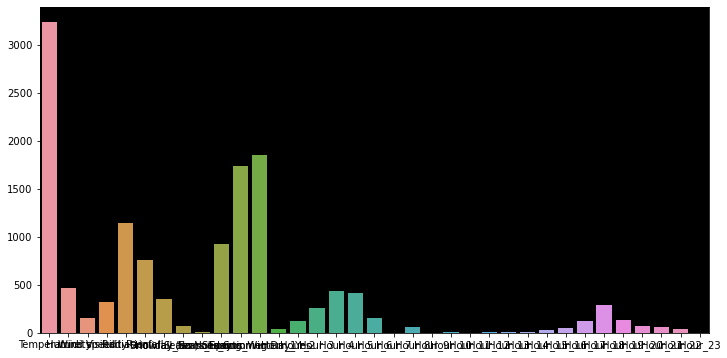

In [37]:
for i, j in enumerate(X.columns):
    print(f' {j} : {feature_contribution[i]: .2f}%')
plt.figure(figsize = (12, 6))
sns.barplot(x = X.columns, y = fs.scores_)
plt.show()

From the above bar graph we can see the feature importance and we will include only those features which are more important for our model

### Splitting our dataset into train and test set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# splitting our dataset in 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Feature scaling

What is normalization?  
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.  It is also known as Min_Max scaling

What is standardization?  
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Standardization will be used here

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modeling  
Performance measures for regression

R-square / Mean Square Error

K-fold cross validation  
Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set

In [42]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [43]:
# creating dictionary for storing different models accuracy
model_comparison = {}

Linear Regression

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred) * 100 : .2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred) * 100 : .2f}%')
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print('Cross Val Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
print('Cross Val Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))
model_comparison['Linear Regression'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred,), (accuracies.mean()), (accuracies.std())]

Model R-Square :  80.76%
Model MSE :  19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


Linear Regression Summary

In [45]:
import statsmodels.api as sm
lin_reg = sm.OLS(y_train, X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:56:43   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

Assumptions of linear regression

In [46]:
residuals = lin_reg.resid
fitted_value = lin_reg.fittedvalues

In [47]:
np.mean(residuals)

0.010699177021444206

Checking for normality of the residuals

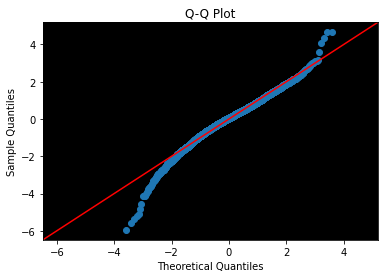

In [48]:
sm.qqplot(residuals, fit = True, line = '45')
plt.title('Q-Q Plot')
plt.show()

Checking for homoscedasticity

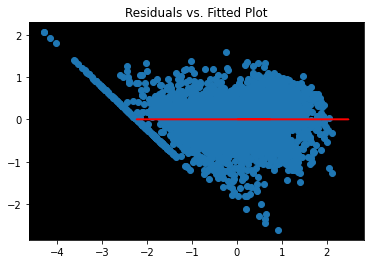

In [49]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0] * len(y_train), c = 'r')
plt.title('Residuals vs. Fitted Plot')
plt.show()

Ploynomial Regression

In [50]:
poly_reg = PolynomialFeatures(degree = 2)
model = LinearRegression()
model.fit(poly_reg.fit_transform(X_train), y_train)
y_pred = model.predict(poly_reg.fit_transform(X_test))
print(f'Model R-Square : {r2_score(y_test, y_pred) * 100: .2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred) * 100: .2f}%')
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Cross Val Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))
model_comparison['Polynomial Regression'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), (accuracies.mean()), (accuracies.std())]

Model R-Square :  88.67%
Model MSE :  11.29%
Cross Val Accuracy: 80.35%
Cross Val Standard Deviation: 0.59%


Decision Tree Regression

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred) * 100:.2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred) * 100: .2f}%')
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Cross Val Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))
model_comparison['Decision Tree Regression'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), (accuracies.mean()), (accuracies.std())]

Model R-Square : 79.67%
Model MSE :  20.25%
Cross Val Accuracy: 79.17%
Cross Val Standard Deviation: 0.97%


Random Forest Regression

In [52]:
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred) * 100: .2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred) * 100: .2f}%')
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Cross Val Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))
model_comparison['Random forest Regresson'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), (accuracies.mean()), (accuracies.std())]

Model R-Square :  87.32%
Model MSE :  12.63%
Cross Val Accuracy: 88.21%
Cross Val Standard Deviation: 0.65%


Bagging Resgression

In [53]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(RandomForestRegressor(n_estimators = 10, random_state = 0), random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model R-Squared : {r2_score(y_test, y_pred) * 100: .2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred) * 100: .2f}%')
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print('Cross Val Accuracy : {:.2f}%'.format(accuracies.mean() * 100))
print('Cross Val Standard Deviation : {:.2f}%'.format(accuracies.std() * 100))
model_comparison['Bagging Regressor'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), (accuracies.mean()), (accuracies.std())]

Model R-Squared :  88.42%
Model MSE :  11.53%
Cross Val Accuracy : 89.08%
Cross Val Standard Deviation : 0.66%


Stacking Regression

In [54]:
estimators = [('linear resgression', LinearRegression()), ('Decision Tree', DecisionTreeRegressor()), ('random forest', RandomForestRegressor(n_estimators = 10, random_state = 0)), ('bagging', BaggingRegressor(RandomForestRegressor(n_estimators = 10, random_state = 0), random_state = 0))]

In [55]:
model = StackingRegressor(estimators = estimators, final_estimator = LinearRegression(), passthrough = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred) * 100:.2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred) * 100:.2f}%')
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Cross Val Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))
model_comparison['Stacking Regressor'] = [r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), (accuracies.mean()), (accuracies.std())]

Model R-Square : 89.03%
Model MSE : 10.92%
Cross Val Accuracy: 89.73%
Cross Val Standard Deviation: 0.58%


### Model Comparison

In [56]:
Model_com_df = pd.DataFrame(model_comparison).T
Model_com_df.columns = ['R-Square', 'MSE', 'CV Accuracy', 'CV std']
Model_com_df = Model_com_df.sort_values(by = 'R-Square', ascending = False)
Model_com_df.style.format('{:.2%}').background_gradient(cmap = 'RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.03%,10.92%,89.73%,0.58%
Polynomial Regression,88.67%,11.29%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regresson,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,79.67%,20.25%,79.17%,0.97%


Maximum Accuracies in each Column

In [57]:
Model_com_df.style.highlight_max().set_caption('Maximum Score in each Column').format('{:.2%}')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.03%,10.92%,89.73%,0.58%
Polynomial Regression,88.67%,11.29%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regresson,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,79.67%,20.25%,79.17%,0.97%


Minimum Accuracies in each Column

In [58]:
Model_com_df.style.highlight_min().set_caption('Minimum Score in each Column').format('{:.2%}')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.03%,10.92%,89.73%,0.58%
Polynomial Regression,88.67%,11.29%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regresson,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,79.67%,20.25%,79.17%,0.97%
